In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [4]:
train = pd.read_csv('./archive/fashion-mnist_train.csv')
test = pd.read_csv('./archive/fashion-mnist_test.csv')
public = pd.read_csv('./archive/fashion-mnist_public.csv')
private = pd.read_csv('./archive/fashion-mnist_private.csv')

In [5]:
X_train = train.drop(['label'], axis = 1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train.shape

(60000, 784)

In [7]:
y_train = train['label']
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [8]:
y_train.shape

(60000,)

In [9]:
X_test = test.drop(['label'], axis = 1)
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
X_test.shape

(10000, 784)

In [11]:
y_test = test['label']
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [12]:
y_test.shape

(10000,)

In [13]:
X_public = public.drop(['label'], axis = 1)
X_public

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.0,0.0,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,14.0,53.0,99.0,17.0,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,...,32.0,23.0,14.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,52.0,23.0,28.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,175.0,172.0,172.0,182.0,199.0,222.0,42.0,0.0,1.0,0.0
9998,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
y_public = public['label']

In [15]:
y_public.shape

(10000,)

In [16]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
X_public_scale = scaler.transform(X_public)
private_scale = scaler.transform(private)

In [17]:
pca = PCA(n_components=187, random_state=42)
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)
X_public_pca = pca.transform(X_public_scale)
private_pca = pca.transform(private_scale)

In [18]:
X_train_pca.shape

(60000, 187)

In [19]:
X_test_pca.shape

(10000, 187)

In [20]:
X_public_pca.shape

(10000, 187)

In [21]:
private_pca.shape

(15000, 187)

In [22]:
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [23]:
# 1. LR Model
logistic = LogisticRegression(max_iter=200, solver='liblinear')
logistic.fit(X_train_PCA1, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [24]:
# 2. SVC Model
svc = SVC(C=13, kernel='rbf', gamma="auto", probability=True)
svc.fit(X_train_PCA1, y_train)

SVC(C=13, gamma='auto', probability=True)

In [25]:
# 3. Random Forest
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_PCA1, y_train)

RandomForestClassifier(criterion='entropy', max_depth=70)

In [26]:
# 4. Gradient Boosting Method 
Gradient = ensemble.GradientBoostingClassifier(n_estimators=100)
Gradient.fit(X_train_PCA1, y_train)

GradientBoostingClassifier()

In [27]:
# 5. XGBoost Method
xgb = XGBClassifier(use_label_encoder=False, objective="multi:softmax", eval_metric="merror")
xgb.fit(X_train_PCA1, y_train)

/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [28]:
# 6. lightGBM Method
lgbm = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=10, num_iterations=100, max_depth=4, learning_rate = 0.01, n_estimators=100, nthreads=4, silent=False, boost_from_average=True)
lgbm.fit(X_train_PCA1, y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47685
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 187
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boost_from_average=True, learning_rate=0.01, max_depth=4,
               nthreads=4, num_class=10, num_iterations=100,
               objective='multiclass', silent=False)

In [29]:
y_train_lr = logistic.predict(X_train_PCA1)
y_pred_lr = logistic.predict(X_test_pca)
y_public_lr = logistic.predict(X_public_pca)
logistic_train = metrics.accuracy_score(y_train, y_train_lr)
logistic_accuracy = metrics.accuracy_score(y_test, y_pred_lr)
logistic_public = metrics.accuracy_score(y_public, y_public_lr)  

print("Train Accuracy score: {}".format(logistic_train))
print("Test Accuracy score: {}".format(logistic_accuracy))
print("Public Accuracy score: {}".format(logistic_public))
print(metrics.classification_report(y_test, y_pred_lr))

Train Accuracy score: 0.85765
Test Accuracy score: 0.8538
Public Accuracy score: 0.8538
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.78      0.78      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.80      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.66      0.56      0.61      1000
           7       0.91      0.92      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



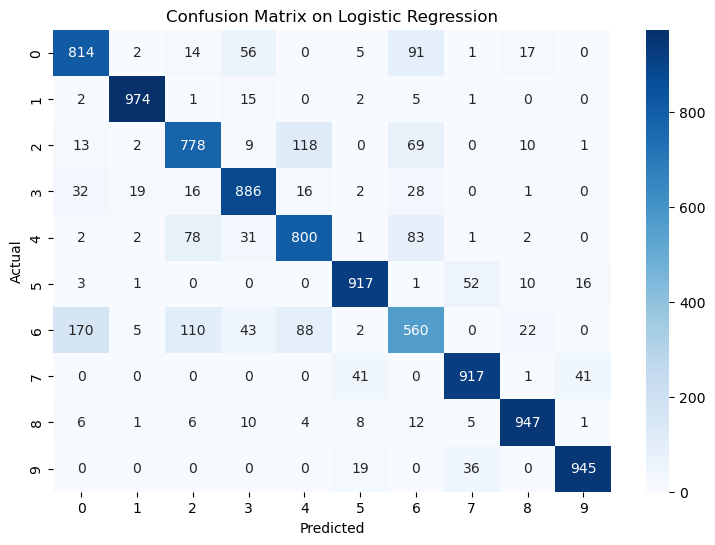

In [30]:
con_matrix = pd.crosstab(pd.Series(y_test.values.flatten(), name='Actual'), pd.Series(y_pred_lr, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [31]:
y_train_svc = svc.predict(X_train_PCA1)
y_pred_svc = svc.predict(X_test_pca)
y_public_svc = svc.predict(X_public_pca)
svc_train = metrics.accuracy_score(y_train, y_train_svc)
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_public = metrics.accuracy_score(y_public, y_public_svc)

print("Train Accuracy score: {}".format(svc_train))
print("Test Accuracy score: {}".format(svc_accuracy))
print("Public Accuracy score:{}".format(svc_public))
print(metrics.classification_report(y_test, y_pred_svc))

Train Accuracy score: 0.9316666666666666
Test Accuracy score: 0.9014
Public Accuracy score:0.9014
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.83      0.83      1000
           3       0.90      0.91      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.95      0.96      1000
           6       0.76      0.72      0.74      1000
           7       0.93      0.96      0.94      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



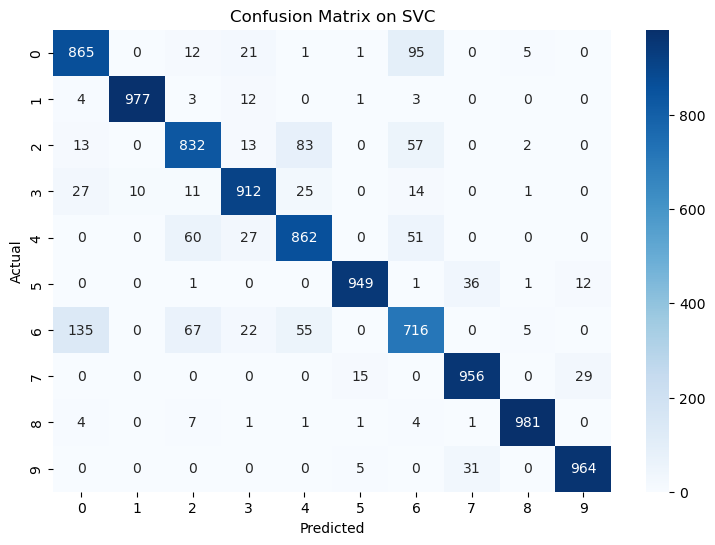

In [32]:
con_matrix = pd.crosstab(pd.Series(y_test.values.flatten(), name='Actual'), pd.Series(y_pred_svc, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [33]:
y_train_forest = random_forest.predict(X_train_PCA1)
y_pred_forest = random_forest.predict(X_test_pca)
y_public_forest = random_forest.predict(X_public_pca)
random_forest_train = metrics.accuracy_score(y_train, y_train_forest)
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_public = metrics.accuracy_score(y_public, y_public_forest)

print("Train Accuracy score: {}".format(random_forest_train))
print("Test Accuracy score: {}".format(random_forest_accuracy))
print("Public Accuracy score: {}".format(random_forest_public))
print(metrics.classification_report(y_test, y_pred_forest))

Train Accuracy score: 0.9999833333333333
Test Accuracy score: 0.8648
Public Accuracy score: 0.8648
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.80      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.84      0.81      1000
           5       0.93      0.91      0.92      1000
           6       0.74      0.56      0.64      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.97      0.95      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



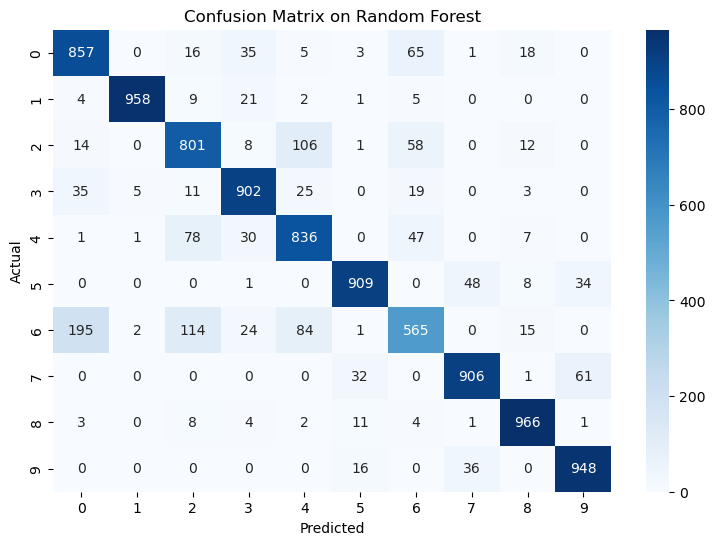

In [34]:
con_matrix = pd.crosstab(pd.Series(y_test.values.flatten(), name='Actual'), pd.Series(y_pred_forest, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Random Forest")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [35]:
y_train_gradient = Gradient.predict(X_train_PCA1)
y_pred_gradient = Gradient.predict(X_test_pca)
y_public_gradient = Gradient.predict(X_public_pca)
gradient_train = metrics.accuracy_score(y_train, y_train_gradient)
gradient_accuracy = metrics.accuracy_score(y_test, y_pred_gradient)
gradient_public = metrics.accuracy_score(y_public, y_public_gradient)

print("Train Accuracy score: {}".format(gradient_train))
print("Test Accuracy score: {}".format(gradient_accuracy))
print("Public Accuracy score: {}".format(gradient_public))
print(metrics.classification_report(y_test, y_pred_gradient))

Train Accuracy score: 0.8791666666666667
Test Accuracy score: 0.8503
Public Accuracy score: 0.8503
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.80      0.79      1000
           5       0.92      0.90      0.91      1000
           6       0.67      0.61      0.64      1000
           7       0.88      0.89      0.89      1000
           8       0.95      0.93      0.94      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



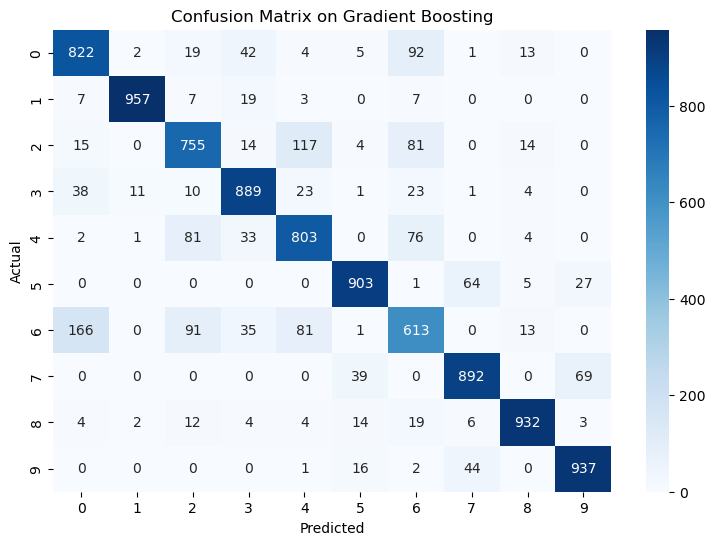

In [36]:
con_matrix = pd.crosstab(pd.Series(y_test.values.flatten(), name='Actual'), pd.Series(y_pred_gradient, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Gradient Boosting")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [37]:
y_train_xgboost = xgb.predict(X_train_PCA1)
y_pred_xgboost = xgb.predict(X_test_pca)
y_public_xgboost = xgb.predict(X_public_pca)
xgb_train = metrics.accuracy_score(y_train, y_train_xgboost)
xgb_accuracy = metrics.accuracy_score(y_test, y_pred_xgboost)
xgb_public = metrics.accuracy_score(y_public, y_public_xgboost)

print("Train Accuracy score: {}".format(xgb_train))
print("Test Accuracy score: {}".format(xgb_accuracy))
print("Public Accuracy score:{}".format(xgb_public))
print(metrics.classification_report(y_test, y_pred_xgboost))

Train Accuracy score: 0.9995166666666667
Test Accuracy score: 0.8861
Public Accuracy score:0.8861
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.91      0.91      0.91      1000
           4       0.82      0.85      0.84      1000
           5       0.96      0.94      0.95      1000
           6       0.72      0.68      0.70      1000
           7       0.93      0.93      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

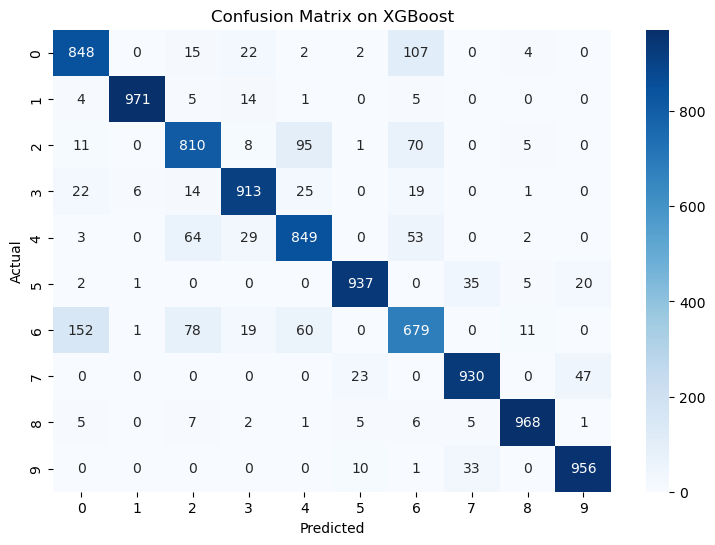

In [38]:
con_matrix = pd.crosstab(pd.Series(y_test.values.flatten(), name='Actual'), pd.Series(y_pred_xgboost, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on XGBoost")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [39]:
y_train_lgbm = lgbm.predict(X_train_PCA1)
y_pred_lgbm = lgbm.predict(X_test_pca)
y_public_lgbm = lgbm.predict(X_public_pca)
lgbm_train = metrics.accuracy_score(y_train, y_train_lgbm)
lgbm_accuracy = metrics.accuracy_score(y_test, y_pred_lgbm)
lgbm_public = metrics.accuracy_score(y_public, y_public_lgbm)

print("Train Accuracy score: {}".format(lgbm_train))
print("Test Accuracy score: {}".format(lgbm_accuracy))
print("Public Accuracy score: {}".format(lgbm_public))
print(metrics.classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
Train Accuracy score: 0.8114166666666667
Test Accuracy score: 0.8015
Public Accuracy score: 0.8015
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1000
           1       0.97      0.94      0.95      1000
           2       0.69      0.73      0.71      1000
           3       0.80      0.87      0.83      1000
           4       0.70      0.73      0.71      1000
           5       0.86      0.86      0.86      1000
           6       0.65      0.44      0.53      1000
           7       0.85      0.83      0.84      1000
           8       0.92      0.89      0.91      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



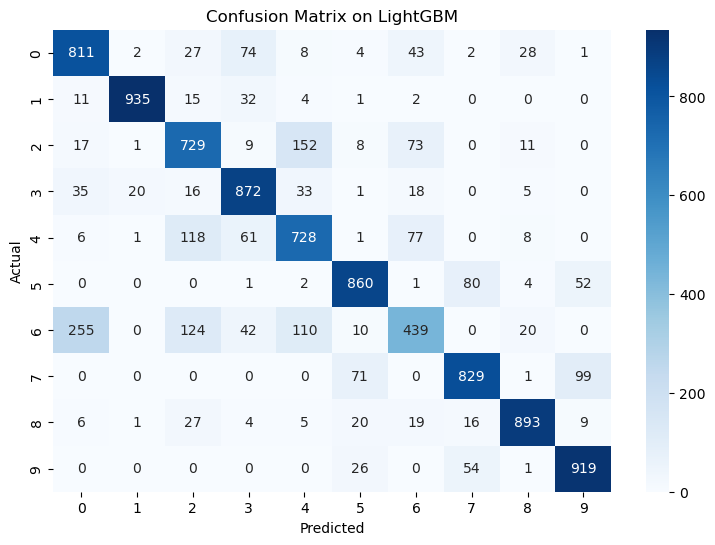

In [40]:
con_matrix = pd.crosstab(pd.Series(y_test.values.flatten(), name='Actual'), pd.Series(y_pred_lgbm, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on LightGBM")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [41]:
Train_Accuracy = [logistic_train,
                  svc_train,
                  random_forest_train,
                  gradient_train,
                  xgb_train,
                  lgbm_train]
Test_Accuracy = [logistic_accuracy,
                 svc_accuracy,
                 random_forest_accuracy,
                 gradient_accuracy,
                 xgb_accuracy,
                 lgbm_accuracy]
Public_Accuracy = [logistic_public,
                   svc_public,
                   random_forest_public,
                   gradient_public,
                   xgb_public,
                   lgbm_public]
data1 = {
    'Algorithm': ['Logistic Regression',
                  'SVC',
                  'Random Forest Classifier',
                  'Gradient Boosting',
                  'XGBoost', 
                  'LightGBM'],
    'Train Accuracy':Train_Accuracy,
    'Test Accuracy':Test_Accuracy,
    'Public Accuracy':Public_Accuracy
}

df1 = pd.DataFrame(data1)

In [42]:
df1

,Algorithm,Train Accuracy,Test Accuracy,Public Accuracy
0,Logistic Regression,0.857650,0.8538,0.8538
1,SVC,0.931667,0.9014,0.9014
2,Random Forest Classifier,0.999983,0.8648,0.8648
3,Gradient Boosting,0.879167,0.8503,0.8503
4,XGBoost,0.999517,0.8861,0.8861
5,LightGBM,0.811417,0.8015,0.8015


In [43]:
fig = go.Figure(data=[
    go.Bar(name='train set', x=data1['Algorithm'], y=data1['Train Accuracy'],text=np.round(data1['Train Accuracy'],2),textposition='outside'),
    go.Bar(name='test set', x=data1['Algorithm'], y=data1['Test Accuracy'],text=np.round(data1['Test Accuracy'],2),textposition='outside'), 
    go.Bar(name='public set', x=data1['Algorithm'], y=data1['Public Accuracy'],text=np.round(data1['Public Accuracy'],2),textposition='outside')
])

fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show()

In [44]:
voting = ensemble.VotingClassifier([('Logistic', logistic),
                                    ('SVC', svc),
                                    ('RandomForest', random_forest),
                                    ('GradientBoost', Gradient),
                                    ('XGBoost', xgb),
                                    ('LightGBM', lgbm)],
                                    voting='soft', n_jobs=-1, verbose=True)
voting.fit(X_train_PCA1, y_train)

/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47685
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 187
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(max_iter=200,
                                                 solver='liblinear')),
                             ('SVC', SVC(C=13, gamma='auto', probability=True)),
                             ('RandomForest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=70)),
                             ('GradientBoost', GradientBoostingClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softmax',
                                            predictor=None, ...)),
                             ('LightGBM',
                              LGBMClassifier(boost_from_average=True,
                                             learning_rate=0.01, max_depth=4,
                                             nthreads=4, num_class=10,
                                             num_iterations=100,
                                             objective='multiclass',
                                             silent=False))],
                 n_jobs=-1, verbose=True, voting='soft')

In [45]:
y_train_voting = voting.predict(X_train_PCA1)
y_pred_voting = voting.predict(X_test_pca)
y_public_voting = voting.predict(X_public_pca)
voting_train = metrics.accuracy_score(y_train, y_train_voting)
voting_accuracy = metrics.accuracy_score(y_test, y_pred_voting)
voting_public = metrics.accuracy_score(y_public, y_public_voting)

print("Train Accuracy score: {}".format(voting_train))
print("Test Accuracy score: {}".format(voting_accuracy))
print("Public Accuracy score:{}".format(voting_public))
print(metrics.classification_report(y_test, y_pred_voting))

/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/dl/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
Train Accuracy score: 0.9668833333333333
Test Accuracy score: 0.8857
Public Accuracy score:0.8857
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.89      0.92      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.95      0.94      0.95      1000
           6       0.75      0.65      0.70      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



In [46]:
private_preds_dict = {image: label for image, label in enumerate(y_public_voting)}

with open(f'./publictestResult_g.txt', 'w') as file:
    for image, label in private_preds_dict.items():
        file.write(f'{image:05d} {label}\n')

In [47]:
voting_private = voting.predict(private_pca)

[LightGBM] [Warning] Unknown parameter: silent


In [48]:
private_preds_dict = {image: label for image, label in enumerate(voting_private)}

with open(f'./testResult_g.txt', 'w') as file:
    for image, label in private_preds_dict.items():
        file.write(f'{image:05d} {label}\n')